<a href="https://colab.research.google.com/github/DaniyalK03/Fire-Detection/blob/main/Fire_or_No_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fire or No Fire?

In this miniproject you will attempt to identify fires from aerial vehicle cameras.

From the dataset creators, "Wildfires are one of the deadliest and dangerous natural disasters in the world. Wildfires burn millions of forests and they put many lives of humans and animals in danger. Predicting fire behavior can help firefighters to have better fire management and scheduling for future incidents and also it reduces the life risks for the firefighters. Recent advance in aerial images shows that they can be beneficial in wildfire studies. Among different methods and technologies for aerial images, Unmanned Aerial Vehicles (UAVs) and drones are beneficial to collect information regarding the fire."

## Dataset description

The data was obtained from flying an aerial vehicle over an area during a period of prescribed burning. The original data is in the form of a video, whilst here that video has been resized and split into individual frames. Given the nature of this dataset there is a lot of similarity between some of the images (e.g. neighbouring frames in the video). For further information about this dataset please see the [arxiv paper](https://arxiv.org/pdf/2012.14036.pdf)

### Things to think about
* What kind of data processing is appropriate?
* Should you split your traiing sample further to give a validation sample?
* What is an appropriate cost or loss function?
* Should you consider data augementation?
* Do you need to balance your data set in some way

In [ ]:
# Importing the files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import standard libraries and imageio to read in the images
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import math

# Importing TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


In [ ]:
def getImage(hasFire,whichImg):
    """Get one of the training images

    Keyword arguments:
    hasFire -- a boolean True/False
    whichImg -- the number of the image

    Returns:
    a tuple of label,image
    """
    if hasFire:
        label="Fire"
        filename= '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/Fire/resized_frame'+str(whichImg)+'.jpg'
    else:
        label="No Fire"
        filename='/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire/resized_frame'+str(whichImg)+'.jpg'
        if not os.path.isfile(filename):
            label="No Fire Lake"
            filename='/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire/lake_resized_lake_frame'+str(whichImg)+'.jpg'

    return label,imageio.imread(filename) #Read and return the  image

Text(0.5, 1.0, 'No Fire')

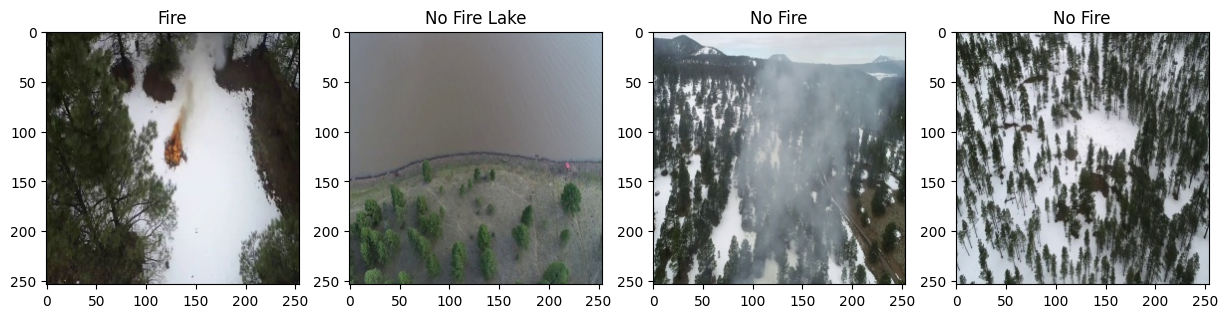

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(15, 15)) #This fig size was convenient for my screen
label,im=getImage(True, 0)
ax[0].imshow(im)
ax[0].set_title(label)
label,im=getImage(False,3)
ax[1].imshow(im)
ax[1].set_title(label)
label,im=getImage(False,3550)
ax[2].imshow(im)
ax[2].set_title(label)
label,im=getImage(False,17202)
ax[3].imshow(im)
ax[3].set_title(label)

# Mini Project - Introduction

**Submission by SN: 21015796**

The following notebook has been submitted as code for the PHAS0056 Mini Project.

This notebook takes a series of images from a video of prescribed burning and splits the images into Training and Test sets that are further divided into Fire and No Fire subsets.

Due to the extremely large number of images present, the data was loaded using generators, rescaled, and was augmented for training.

Initially, a Binary classification was performed using a multilayer Convolutional Neural Network (CNN) for the data to split images into classes of Fire and No Fire. Temporal sampling was used to ensure a wide range of data was covered effectively. The data was further divided to form a validation set. The model used closely replicated the one used in the study where the dataset is taken from [1].

Following this, a Ternary classification was performed using a similar AlexNet CNN with the data from the Training No Fire file split to form No Fire and No Fire Lake subsets [6].  As the data for the Test No Fire included no images from the No Fire Lake category, the No Fire Lake category from the Training was reused in Testing.

It was noted that the Ternary classification was highly accurate, reaching accuracies close to the original study. Reasoning for the implementation of specific Machine Learning techniques can be sought in the accompanying submitted report.

*Bibliography*

[1] A. Shamsoshoara et al., "Aerial Imagery Pile burn detection using Deep
Learning: the FLAME dataset", Journal of Computer Networks, vol. 193, 2021.

[2] B. Phan, "10 Minutes to Building a Fully-Connected Binary Image Classifier in TensorFlow", Towards Data Science, 2020.

[3] TensorFlow, "tf.keras.preprocessing.image.ImageDataGenerator", TensorFlow Documentation, 2024 [Online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

[4] TensorFlow, "Load and preprocess images", TensorFlow Documentation, 2023 [Online] Available at: https://www.tensorflow.org/tutorials/load_data/images

[5] Python, "shutil — High-level file operations", Python Documentation, 2024 [Online] Available at: https://docs.python.org/3/library/shutil.html


[6] A. Krizhevsky, I. Sutskever, and G. E. Hinton, "ImageNet Classification with Deep Convolutional Neural Networks", Advances in Neural Information Processing Systems 25, 2012.

### **Task 1**


In [ ]:
# The directories for the original files provided in the dataset
train_fire_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/Fire/")
train_nofire_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire/")
test_fire_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Test/Fire/")
test_nofire_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Test/No_Fire/")

In [ ]:
#print('total training fire images:', len(os.listdir(train_fire_dir)))
#print('total training no fire images:', len(os.listdir(train_nofire_dir)))
#print('total test fire images:', len(os.listdir(test_fire_dir)))
#print('total test no fire images:', len(os.listdir(test_nofire_dir)))

Due to the large volume of images, it was computationally efficient to load the images using generators instead of the method shown above to display images [2], [3]. The data was augmented and split to from a validation set [3], [4].


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Images rescaled by 1/255 and the data augmented through rotations, shears, zooms and random image flips
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20, # Randomly rotate by 20 degrees
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2, # Randomly shear at variable scale
                                   zoom_range=0.2, # Randomly zoom at variable scale
                                   horizontal_flip=True, # Randomly flip images horizontally
                                   #vertical_flip=True # Randomly flip images vertically (Removed for performance times)
                                   fill_mode='nearest')

# Rescaling the images
test_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Extracting training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/',  # This is the source directory for training images
        classes = ['Fire', 'No_Fire'], # 2 image classes
        target_size=(255, 255),  # All images will be resized to 255 x 255
        batch_size=32,
        class_mode='binary',
        shuffle=True) # Shuffle the order in which images are processed.


def train_generator_function():
  '''
  This function exists only to return the generator for the training images from above
  '''
  return train_generator

# Forming a dataset outputted in a suitable shape using the function to call train_generator for efficiency
train_dataset = tf.data.Dataset.from_generator(
    train_generator_function,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 255, 255, 3], [None])
)

# Sample of a shuffled small batch from the training dataset using temporal sampling
sampled_train_dataset = train_dataset.shuffle(1000).take(1000)



# Extracting test images in batches of 120 using test_datagen generator, larger batch size for quicker process used here
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Test/',  # This is the source directory for training images
        classes = ['Fire', 'No_Fire'], # 2 image classes
        target_size=(255, 255),  # All images will be resized to 255x255
        batch_size=120,
        class_mode='binary',
        shuffle=False)

# Splitting the validation data in batches of 32 using the training data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/", validation_split=0.2, subset="validation", seed=1337, image_size=(255,255),
    batch_size=32, shuffle=True
    )


Found 30611 images belonging to 2 classes.


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


Found 8607 images belonging to 2 classes.
Found 30611 files belonging to 2 classes.
Using 6122 files for validation.


In [ ]:
# A multilayer convolutional neural network similar to the one used in the original study [1]

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8, (3, 3), strides = (2,2), activation='relu', input_shape=(255, 255, 3)),
                                    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
                                    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((3,3), strides = (2,2)),
                                    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
                                    tf.keras.layers.Flatten(input_shape = (255,255,3)),
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 8)       584       
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 8)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 8)         584       
                                                                 
 flatten (Flatten)           (None, 27848)             0         
                                                        

In [ ]:
# Compiling the model using binary_crossentropy due to 2 classes
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Training the model on Training images and validating on split dataset
history = model.fit(sampled_train_dataset,
      steps_per_epoch=10,
      epochs=10,
      verbose=1,
      validation_data = val_ds,
      validation_steps=10)

Epoch 1/10
10/10 [==============================] - 886s 1s/step - loss: 0.4827 - accuracy: 0.7375 - val_loss: 68.0947 - val_accuracy: 0.7844
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.3345 - accuracy: 0.8125 - val_loss: 93.7354 - val_accuracy: 0.7937
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 0.2869 - accuracy: 0.8188 - val_loss: 117.1641 - val_accuracy: 0.7812
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.2851 - accuracy: 0.9000 - val_loss: 179.0680 - val_accuracy: 0.7969
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 0.2679 - accuracy: 0.9125 - val_loss: 155.8192 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.2750 - accuracy: 0.9500 - val_loss: 221.5103 - val_accuracy: 0.7812
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.1542 - accuracy: 0.9812 - val_loss: 200.3375 - val_accuracy: 0.8000
Epoch 8

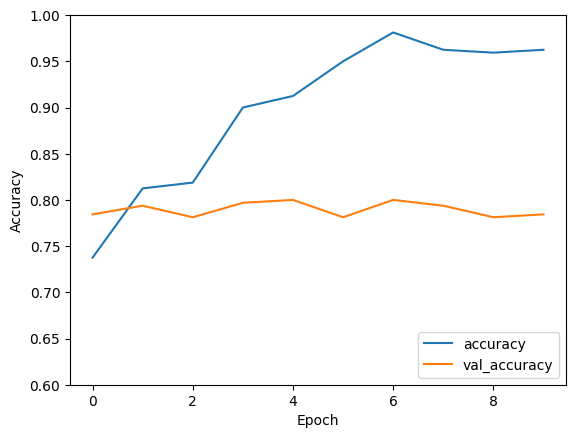

In [ ]:
# Plotting accuracy and validation accuracy to determine efficacy of convolutional neural network
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.60, 1])
plt.legend(loc='lower right')


This split between the training accuracy and validation accuracy as more Epochs of training are conducted implies that the model is overfitting. Perhaps the implementation of dropout layers to the CNN is neccessary.

In [ ]:
# Testing the model on batches of Testing images
model.evaluate(test_generator)

72/72 [==============================] - 74s 1s/step - loss: 1.1705 - accuracy: 0.6313


[1.170461893081665, 0.631346583366394]

The testing accuracy confirms that the model has likely been overfitted to the training data.

### **Task 2**


The code cells below have been commented out as they should not be re-run due to their output changing the contents of the file directories [5].

In [ ]:
# The code below was used to copy and split the No_Fire Training images into 2 subsets of No_Fire and No_Fire_Lake


#import shutil

# Define source and destination directories
#source_dir = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire'
#destination_no_fire_dir = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire_copy'
#destination_no_fire_lake_dir = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/No_Fire_Lake_copy'

# Create destination directory for No_Fire if it doesn't exist
#if not os.path.exists(destination_no_fire_dir):
    #os.makedirs(destination_no_fire_dir)

# Iterate through files in the source directory
#for filename in os.listdir(source_dir):
    #if filename.startswith('resized_frame'):  # Check if it's a 'No_Fire' image
        #shutil.copy(os.path.join(source_dir, filename), os.path.join(destination_no_fire_dir, filename))
    #elif filename.startswith('lake_resized_lake_frame'):  # Check if it's a 'No_Fire_Lake' image
        #shutil.copy(os.path.join(source_dir, filename), os.path.join(destination_no_fire_lake_dir, filename))


This above cell was used to  split the Training No Fire file into 2 files splitting the original set of images into No Fire and No Fire Lake.

In [ ]:
# This code was used to copy the Training Fire images into a folder with the split Training No_Fire images


#source_dir2 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/Fire'
#destination_fire_dir2 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Training/Ternary_copy/Fire_copy'

#for filename in os.listdir(source_dir2):
  #shutil.copy(os.path.join(source_dir2, filename), os.path.join(destination_fire_dir2, filename))


This above cell copies the Training Fire file into the Ternary copy folder that is used to train the Ternary model.

In [ ]:
# This code was used to create a Testing folder that also contained the Training No_Fire_Lake images to be able to test all classes

#import shutil

#source_dir3 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Test/Fire'
#destination_fire_dir3 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_Test_copy/Fire_copy'

#for filename in os.listdir(source_dir3):
  #shutil.copy(os.path.join(source_dir3, filename), os.path.join(destination_fire_dir3, filename))



#source_dir4 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Test/No_Fire'
#destination_fire_dir4 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_Test_copy/No_Fire_copy'

#for filename in os.listdir(source_dir4):
  #shutil.copy(os.path.join(source_dir4, filename), os.path.join(destination_fire_dir4, filename))



#source_dir5 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_copy/No_Fire_Lake_copy'
#destination_fire_dir5 = '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_Test_copy/No_Fire_Lake_copy'

#for filename in os.listdir(source_dir5):
  #shutil.copy(os.path.join(source_dir5, filename), os.path.join(destination_fire_dir5, filename))


This above cell copies the contents of the Test folder into Ternary Test copy and copies the Training No Fire Lake file to form the Ternary Test copy folder as the Testing folder for the Ternary model.

The cell below uses the same data augmentation and rescaling as the Binary classification in Task 1.

In [ ]:

# Extracting training images in batches of 32 using train_datagen
train_generator2 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_copy',  # This is the source directory for training images
        classes = ['Fire_copy', 'No_Fire_copy', 'No_Fire_Lake_copy'], # 3 image classes
        target_size=(255, 255),  # All images will be resized to 255x255
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

test_generator2 = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_Test_copy',
        classes=['Fire_copy', 'No_Fire_copy', 'No_Fire_Lake_copy'], # 3 image classes
        target_size=(255, 255), # All images will be resized to 255x255
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Splitting the validation data in batches of 32 using the training data
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/fireNoFire.zip (Unzipped Files)/Ternary_copy", validation_split=0.2, subset="validation", seed=1337, image_size=(255,255),
    batch_size=32, shuffle=True
    )


Found 30611 images belonging to 3 classes.
Found 13225 images belonging to 3 classes.
Found 30611 files belonging to 3 classes.
Using 6122 files for validation.


In [ ]:
# Building multilayer convolutional neural network but with 3 output neurons for each class using classification architecture similar to AlexNet[6].
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(input_shape=(255, 255, 3)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)  # Activation is softmax
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 127, 127, 8)       224       
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 8)       584       
                                                                 
 conv2d_6 (Conv2D)           (None, 123, 123, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 8)         584       
                                                                 
 flatten_1 (Flatten)         (None, 27848)             0         
                                                      

In [ ]:
# Model compiled using categorical crossentropy due to 3 categories of images to split into
model2.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model on the Training imageset created without validation data as this was problematic
history2 = model2.fit(train_generator2,
                    steps_per_epoch=10,
                    epochs=10,
                    verbose=1)
# Validation data was not in proper one hot vector encoding form
                    #validation_data=val_ds2,
                    #validation_steps=10)

Epoch 1/10
10/10 [==============================] - 71s 7s/step - loss: 0.5056 - accuracy: 0.7781
Epoch 2/10
10/10 [==============================] - 75s 8s/step - loss: 0.3688 - accuracy: 0.8219
Epoch 3/10
10/10 [==============================] - 66s 5s/step - loss: 0.3261 - accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - 58s 6s/step - loss: 0.3271 - accuracy: 0.8625
Epoch 5/10
10/10 [==============================] - 54s 5s/step - loss: 0.2477 - accuracy: 0.8906
Epoch 6/10
10/10 [==============================] - 43s 4s/step - loss: 0.3479 - accuracy: 0.9062
Epoch 7/10
10/10 [==============================] - 49s 5s/step - loss: 0.1745 - accuracy: 0.9688
Epoch 8/10
10/10 [==============================] - 59s 6s/step - loss: 0.2268 - accuracy: 0.9469
Epoch 9/10
10/10 [==============================] - 71s 6s/step - loss: 0.2053 - accuracy: 0.9625
Epoch 10/10
10/10 [==============================] - 49s 5s/step - loss: 0.2158 - accuracy: 0.9500


In [ ]:
# Testing the model on the Testing images created
model2.evaluate(test_generator2)

414/414 [==============================] - 87s 210ms/step - loss: 1.1209 - accuracy: 0.7239


[1.1208548545837402, 0.7239319682121277]

This is a very strong testing accuracy close to the original study accuracy of 76.23% hence the Ternary CNN model is reasonably well suited to classifying the image data.